# Aprendendo sobre web scraping em Python utilizando BeautifulSoup

Quando realizamos tarefas de data science, é comum querermos utilizar dados encontrados na Internet. Você normalmente poderá acessar esses dados no formato .CSV ou por APIs. No entanto, existem momentos em que os dados que você quer somente podem ser acessados como parte de uma página web. Em casos assim, você pode utilizar uma técnica chamada web scraping para obter os dados que você queira da página em um formato com o qual você possa trabalhar em suas análises.

Neste artigo, vamos mostrar como realizar web scraping utilizando Python 3 e a biblioteca BeautifulSoup. Nós vamos buscar dados do Serviço Nacional de Meteorologia (em inglês), e depois analisar utilizando a biblioteca Pandas.

In [1]:
def load_and_show(url):
    from skimage import io
    import matplotlib.pyplot as plt
    # create a file-like object from the url

    fig = plt.figure(figsize=(20,13))
    ax = fig.add_subplot(111)

    # read the image file in a numpy array
    image = io.imread(url)
    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False) 
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    plt.show()

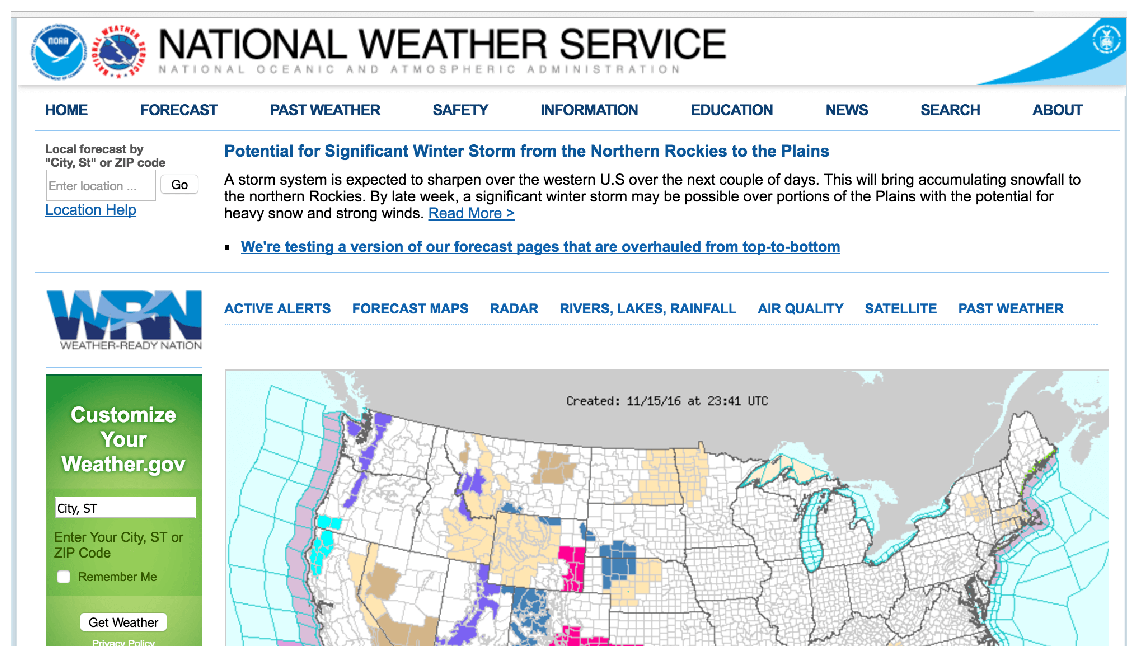

In [47]:
url=("https://static.imasters.com.br/wp-content/uploads/2016/12/1-5.png")
load_and_show(url)

# Os componentes de uma página web


Quando visitamos uma página, nosso navegador faz uma solicitação à um servidor de Internet. Essa solicitação é chamada de solicitação GET, pois estamos recebendo arquivos do servidor. O servidor então envia arquivos que dizem ao navegador como renderizar a página para nós. Os arquivos se enquadram em alguns tipos principais:

- HTML: Contém o conteúdo principal da página;
- CSS: Adiciona estilos para que a página fique mais bonita;
- JS: Arquivos JavaScript adicionam interatividade à página;
- Imagens: formatos de imagem, tais como JPG e PNG permitem que páginas web exibam imagens.
Após nosso navegador receber todos os arquivos, ele renderiza a página e a exibe para nós. Existem muitas coisas que acontecem no background para renderizar bem uma página, mas não precisamos nos preocupar com a maioria delas quando estamos realizando o web scraping. Quando realizamos o web scraping, estamos interessados no conteúdo principal da página, então olharemos para o HTML.

# HTML

HyperText Markup Language (HTML) é uma linguagem com que as páginas web são criadas. O HTML não é uma linguagem de programação, como o Python – em vez disso, é uma linguagem de marcação que diz ao navegador como exibir o conteúdo. O HTML permite que você faça coisas similares ao Microsoft Word – criar parágrafos, deixar textos em negrito etc. Por não ser uma linguagem de programação, o HTML nem se aproxima da complexidade do Python.

Vamos fazer fazer um rápido tour pelo HTML para que possamos saber o suficiente para fazer o web scraping de maneira eficiente. O HTML é formado por elementos chamados tags. A tag mais básica é <HTML>. Essa tag diz ao navegador que tudo dentro dela é HTML. Podemos criar um documento HTML simples utilizando somente essa tag.

<html>
</html>

Ainda não adicionamos conteúdo à página, então, se visualizássemos nosso documento HTML em um navegador, não veríamos nada além de:

<html>
</html>

Dentro da tag html, nós colocamos outras duas tags, <head> e <body>. O conteúdo principal da página vai dentro da tag <body>. A tag <head> contém dados sobre o título da página e outras informações que normalmente não são úteis ao web scraping.

<html>
    <head>
    </head>
    <body>
    </body>
</html>

Nós ainda não temos conteúdo em nossa página (ele vai dentro da tag body), então ainda não vemos nada:

<html>
    <head>
    </head>
    <body>
    </body>
</html>

Você deve ter notado que nós colocamos head e  body dentro de html. Em html, as tags são aninhadas e podem aparecer dentro de outras tags.

Agora, nós vamos adicionar nosso primeiro conteúdo à página, usando a tag “p”. A tag “p” define um parágrafo, e qualquer texto dentro dela é exibido em um parágrafo separado.



<html>
    <head>
    </head>
    <body>
        <p>
            Here's a paragraph of text!
        </p>
        <p>
            Here's a second paragraph of text!
        </p>
    </body>
</html>

<html>
    <head>
    </head>
    <body>
        <p>
            Here's a paragraph of text!
        </p>
        <p>
            Here's a second paragraph of text!
        </p>
    </body>
</html>

As tags têm os nomes normalmente utilizados de acordo com sua posição em relação a outras tags.

- child (filha): Uma tag child é uma tag dentro de outra tag. Então as tags “p” acima são filhas da tag body.
- parent (pai): Uma tag parent é uma tag que tem outras tags dentro. Acima, a tag html é pai de head e body.
- sibling (irmãos): uma tag sibling é aquela que está aninhada dentro do mesmo pai que outra tag. Por exemplo: head e body são irmãs, pois ambas estão dentro da tag html. Ambas as tags “p” são irmãs, pois estão dentro de body.


Nós também podemos adicionar propriedades às tags HTML para mudar seus comportamentos:

<html>
    <head>
    </head>
    <body>
        <p>
            Here's a paragraph of text!
            <a href="https://www.dataquest.io">Learn Data Science Online</a>
        </p>
        <p>
            Here's a second paragraph of text!
            <a href="https://www.python.org">Python</a>
        </p>
    </body>
</html>

<html>
    <head>
    </head>
    <body>
        <p>
            Here's a paragraph of text!
            <a href="https://www.dataquest.io">Learn Data Science Online</a>
        </p>
        <p>
            Here's a second paragraph of text!
            <a href="https://www.python.org">Python</a>
        </p>
    </body>
</html>

No exemplo acima, nós adicionamos duas tags a. As tags a são links, e dizem ao navegador para renderizar uma outra página. A propriedade href determina para onde o link vai.


a e p são tags extremamente comuns. Aqui estão outras:

- div – indica uma divisão, uma área na página;
- b – deixa qualquer texto dentro dela em negrito;
- i – deixa em itálico;
- table – cria uma tabela;
- form – cria um formulário;

Para uma lista completa de tags: https://developer.mozilla.org/en-US/docs/Web/HTML/Element

Antes de seguirmos para o web scraping, vamos aprender as propriedades class e id. Essas propriedades dão nomes aos elementos HTML, e os tornam mais fáceis de interagir quando estamos fazendo o scraping. Cada elemento pode ter várias classes, e uma classe pode ser compartilhada entre elementos. Cada elemento pode ter apenas um  id, e um id pode aparecer somente uma vez na página. Classes e ids são opcionais e nem todos os elementos as terão.

Nós podemos adicionar classes ao nosso exemplo:



<html>
    <head>
    </head>
    <body>
        <p class="bold-paragraph">
            Here's a paragraph of text!
            <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
        </p>
        <p class="bold-paragraph extra-large">
            Here's a second paragraph of text!
            <a href="https://www.python.org" class="extra-large">Python</a>
        </p>
    </body>
</html>

# A biblioteca requests

A primeira coisa que precisamos fazer para realizar o web scrap é baixar a página. Podemos baixar as páginas utilizando a biblioteca requests do Python. A biblioteca requests fará uma solicitação GET ao servidor, que fará o download dos conteúdos HTML da página solicitada para nós. Existem vários tipos de solicitação diferentes que podemos realizar utilizando a biblioteca requests – GET é apenas um deles. Se você quer aprender mais sobre isso,  acesse este link.

Vamos tentar baixar um web site simples, como http://dataquestio.github.io/web-scraping-pages/simple.html.

Primeiro, precisamos baixá-lo utilizando o método requests.get.

In [15]:
import requests

In [16]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")
page

<Response [200]>

Após executar nossa solicitação, nós receberemos um objeto Response. Esse objeto tem uma propriedade status_code que indica se a página foi baixada com sucesso.



In [17]:
page.status_code

200

Um status_code com resultado 200 significa que a página foi baixada com sucesso. Nós não vamos nos aprofundar no códigos dos estados, mas um estado que comece com 2 normalmente indica sucesso, e um código que comece com 4 ou 5 indica erro.

Nós podemos exibir o conteúdo HTML de uma página utilizando a propriedade content.

In [18]:
page.content

b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'

# Analisando uma página com BeautifulSoup


Como você pode ver acima, agora nós baixamos um documento HTML.

Nós podemos utilizar a biblioteca BeautifulSoup para analisar esse documento e extrair o texto da tag p. Primeiro, nós temos que importar a biblioteca e criar uma instância da classe BeautifulSoup para analisar o documento.

In [19]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

Agora, nós podemos exibir o conteúdo HTML da página, formatado corretamente, utilizando o método prettify no objeto BeautifulSoup.

In [20]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>


Como todas as tags estão aninhadas, podemos nos movimentar pela estrutura um nível por vez. Podemos selecionar primeiro os elementos dos níveis superiores da página utilizando a propriedade children do soup. Note que children retorna um gerador de listas, para que possamos chamar sua função list.

In [21]:
list(soup.children)

['html', '\n', <html>
 <head>
 <title>A simple example page</title>
 </head>
 <body>
 <p>Here is some simple content for this page.</p>
 </body>
 </html>]

Acima, vemos que existem duas tags no nível superior da página – a tag inicial <!DOCTYPE html> e a tag <html>. Existe também um caractere de nova linha (\n) na lista. Vamos ver o tipo de cada elemento da lista:

In [22]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype, bs4.element.NavigableString, bs4.element.Tag]

Como você pode ver, todos os itens são objetos BeautiSoup. O primeiro é o objeto Doctype, que contém informações sobre o tipo de documento. O segundo é o NavigableString, que representa o texto encontrado no documento HTML. O item final é um objeto Tag, que contém outras tags aninhadas. O tipo de objeto mais importante, e com o qual nós vamos trabalhar com mais frequência, é o objeto Tag.

O objeto Tag nos permite navegar pelo documento HTML e extrair outras tags e textos. Você pode aprender mais sobre os vários objetos da biblioteca BeautifulSoup aqui.

Agora nós podemos selecionar a tag html e suas filhas pelo terceiro item da lista:



In [24]:
html = list(soup.children)[2]

Cada item da lista retornado pelo objeto children também é um objeto de BeautifulSoup, então nós também podemos chamar o método children no html.

Agora, nós podemos encontrar as filhas dentro da tag html:

In [25]:
list(html.children)


['\n', <head>
 <title>A simple example page</title>
 </head>, '\n', <body>
 <p>Here is some simple content for this page.</p>
 </body>, '\n']

Como você pode ver acima, existem duas tags aqui, head e body. Nós queremos extrair o texto dentro da tag p, então nós vamos mais afundo em body.

In [26]:
body = list(html.children)[3]


In [27]:
list(body.children)


['\n', <p>Here is some simple content for this page.</p>, '\n']

Nós podemos isolar a tag p:

In [28]:
p = list(body.children)[1]

Assim que isolarmos a tag, nós podemos utilizar o método get_text para extrair todo o texto dentro dela.

In [30]:
list(body.children)

['Here is some simple content for this page.']

# Encontrando todas as instâncias de uma tag de uma vez
O que fizemos acima foi útil para aprendermos como navegar pela página, mas precisamos de muitos comandos para algo simples. Se nós queremos extrair uma única tag, nós podemos utilizar o método find_all, que encontrará todas as instâncias de uma tag na página.

In [31]:
soup = BeautifulSoup(page.content, 'html.parser')
soup.find_all('p')

[<p>Here is some simple content for this page.</p>]

Note que find_all retorna uma lista, então vamos ter que procurar, ou utilizar indexação de lista, para extrair o texto.

In [32]:
soup.find_all('p')[0].get_text()

'Here is some simple content for this page.'

Se você quiser, porém, encontrar somente a primeira instância de uma tag, você pode utilizar o método find, que retorna um único objeto BeautifulSoup.

In [33]:
soup.find('p')

<p>Here is some simple content for this page.</p>

# Buscando tags por classe e id

Nós apresentamos classes e ids acima, mas provavelmente não ficou claro por que elas são úteis. Classes e ids são utilizadas pelo CSS para determinar para quais elementos HTML certos estilos são aplicados. Nós também podemos utilizá-las enquanto fazemos o scrap para especificar os elementos em que queremos fazer scrap. Para ilustrar esse princípio, vamos trabalhar com a seguinte página:


<html>
    <head>
        <title>A simple example page</title>
    </head>
    <body>
        <div>
            <p class="inner-text first-item" id="first">
                First paragraph.
            </p>
            <p class="inner-text">
                Second paragraph.
            </p>
        </div>
        <p class="outer-text first-item" id="second">
            <b>
                First outer paragraph.
            </b>
        </p>
        <p class="outer-text">
            <b>
                Second outer paragraph.
            </b>
        </p>
    </body>
</html>

Nós podemos acessar a documentação acima em http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html.

Primeiro, vamos baixar a página e criar um objeto BeautifulSoup:

In [34]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
soup = BeautifulSoup(page.content, 'html.parser')
soup

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                First paragraph.
            </p>
<p class="inner-text">
                Second paragraph.
            </p>
</div>
<p class="outer-text first-item" id="second">
<b>
                First outer paragraph.
            </b>
</p>
<p class="outer-text">
<b>
                Second outer paragraph.
            </b>
</p>
</body>
</html>

Agora nós podemos utilizar o método find_all para buscar por todos os itens por classe e id. No exemplo abaixo, vamos procurar por qualquer tag p que tenha a classe outer-text:

In [35]:
soup.find_all('p', class_='outer-text')

[<p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>, <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

No exemplo abaixo, estamos procurando por qualquer tag que tenha a classe outer-text:

In [36]:
soup.find_all(class_="outer-text")

[<p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>, <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

Nós também podemos buscar elementos pela id.



In [37]:
soup.find_all(id="first")

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>]

# Utilizando seletores CSS

Você também pode realizar buscas por itens utilizando os seletores CSS. Esses seletores são como a linguagem CSS permite que os desenvolvedores especifiquem as tags HTML que receberão os estilos. Aqui estão alguns exemplos:

- p a: Encontra todas as tags a dentro de uma tag p;
- body p a: Encontra as tags a dentro de uma tag p dentro da tag body;
- html body: Encontra todas as tags body dentro de uma tag html;
- p.outer-text: Encontra todas as tags p com uma classe outer-text;
- p#first: Encontra todas as tags p com um id first;
- body p.outer-text: Encontra quaisquer tags p com uma classe outer-text dentro de uma tag body.

Você pode aprender mais sobre os seletores CSS aqui: https://developer.mozilla.org/en-US/docs/Web/Guide/CSS/Getting_started/Selectors

Os objetos BeautifulSoup suportam a busca em páginas utilizando os seletores CSS através do método select. Nós podemos utilizar os seletores CSS para encontrar todas as tags p de nossa página que estiverem dentro de uma div desta maneira:



In [38]:
soup.select("div p")

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>, <p class="inner-text">
                 Second paragraph.
             </p>]

Note que o método select acima retorna uma lista de objetos BeautifulSoup, assim como find e find_all.

# Baixando dados de meteorologia


Agora sabemos o suficiente para seguir com a extração dos dados de meteorologia do Serviço Nacional de Meteorologia. O primeiro passo é encontrar a página que queremos analisar. Nós vamos extrair os dados de meteorologia sobre o centro de São Francisco desta página: http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168#.WERGYu3n77g

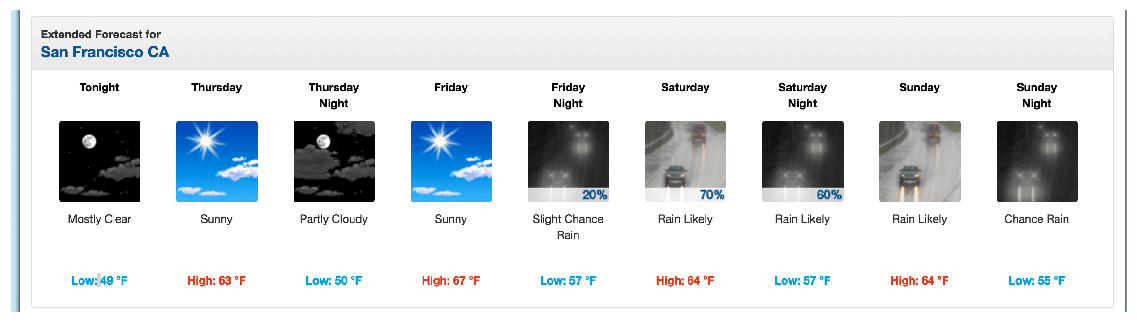

In [48]:
url=("https://static.imasters.com.br/wp-content/uploads/2016/12/5-2.png")
load_and_show(url)

Como vocês podem ver na imagem, a página contém informações sobre a previsão do tempo para a próxima semana, incluindo a parte do dia, temperatura, e uma breve descrição das condições.



# Explorando a página com Chrome DevTools

A primeira coisa que precisaremos fazer é inspecionar a página utilizando o Chrome DevTools. Se estiver utilizando outro navegador, o Firefox e o Safari têm ferramentas equivalentes. Porém, é recomendada a utilização do Chrome.

Você pode iniciar as ferramentas de desenvolvedor no Chrome clicando em View -> Developer -> Developer Tools. Um painel na parte inferior do navegador, como a que vocês veem abaixo, deverá aparecer. Garanta que a aba Elements (Elementos) estará selecionada.




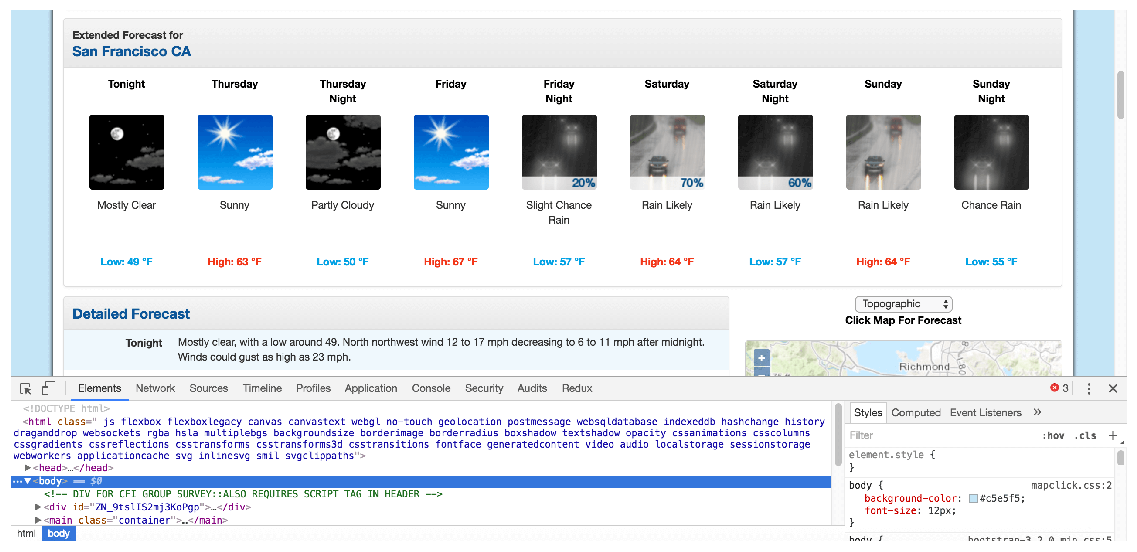

In [49]:
url=('https://static.imasters.com.br/wp-content/uploads/2016/12/6-2.png')
load_and_show(url)

O painel de elementos exibe todas as tags HTML da página, e permite que você navegue por elas. É uma funcionalidade realmente útil.

Clicando com o botão direito na página, próximo de onde está escrito “Extended Forecast”, e em seguida clicando em “Inspect”, vamos abrir a tag que contenha o texto “Extended Forecast” no painel de elementos.



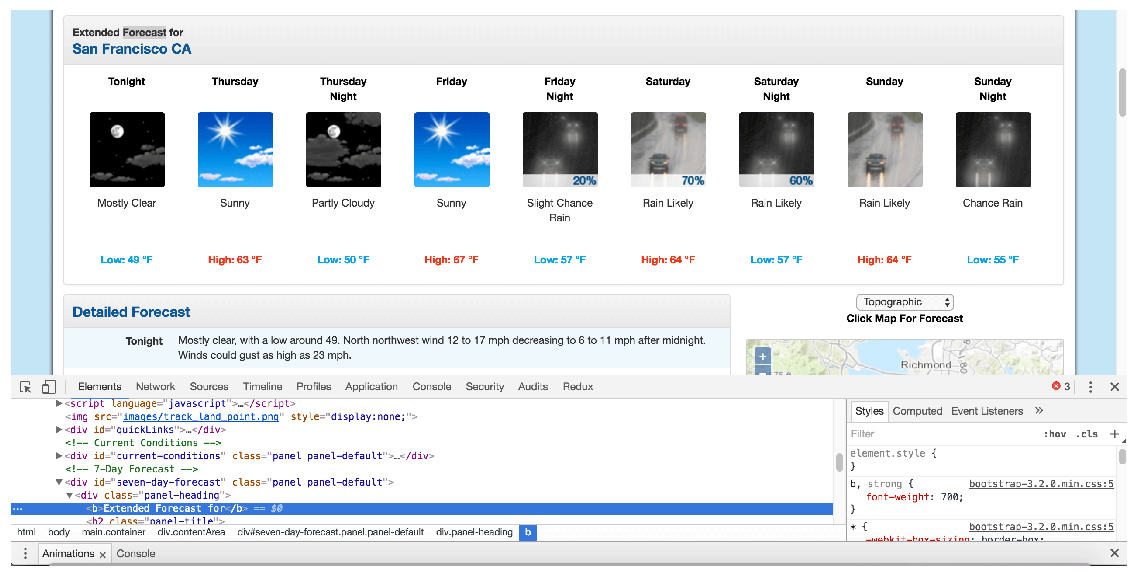

In [50]:
url=('https://static.imasters.com.br/wp-content/uploads/2016/12/7-1.png')
load_and_show(url)

Então, nós podemos navegar pelo painel de elementos para encontrar o elemento mais externo que contenha todo o texto que corresponda às previsões. Nesse caso, é uma tag div com a id seven-day-forecast:

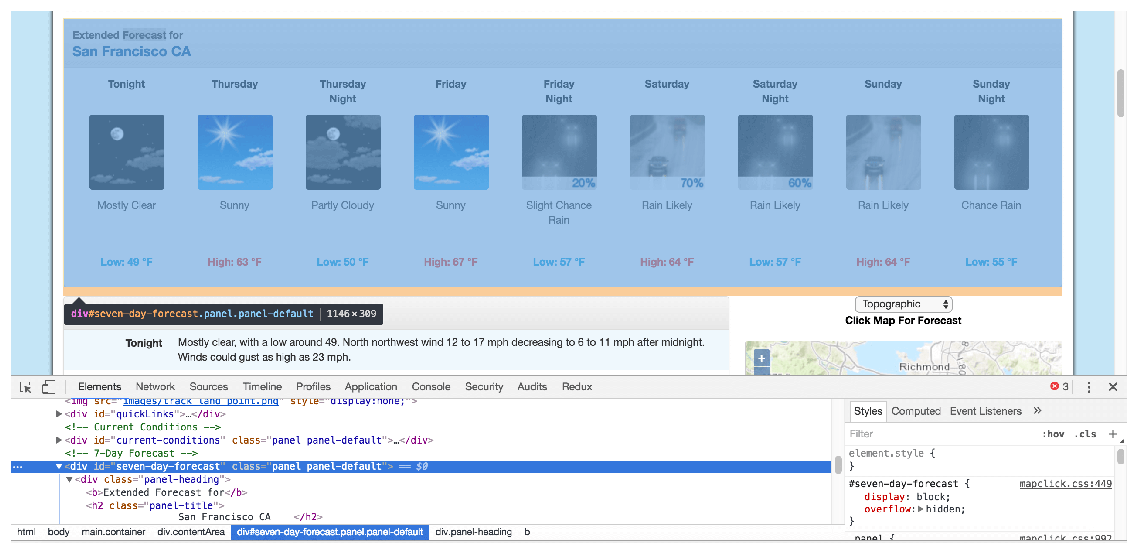

In [51]:
url=('https://static.imasters.com.br/wp-content/uploads/2016/12/8-1.png')
load_and_show(url)

Se você clicar no console e explorar a div, descobrirá que cada item da previsão (como “hoje à noite”, “quinta-feira”, e “quinta-feira à noite”) está contido em uma div com a classe tombstone-container.

Nós sabemos o suficiente para baixar uma página e começar a analisá-la. No código abaixo, nós:

- Baixamos a página que contém as previsões do tempo;
- Criamos uma classe BeautifulSoup para analisar a página;
- Encontramos a div com id seven-day-forecast, e atribuímos para seven_day;
- Dentro de seven_day, encontramos cada item de previsão do tempo individual;
- Extraímos e exibimos o primeiro item da previsão;

In [53]:
page = requests.get("http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")
soup = BeautifulSoup(page.content, 'html.parser')
seven_day = soup.find(id="seven-day-forecast")
forecast_items = seven_day.find_all(class_="tombstone-container")
tonight = forecast_items[0]
print(tonight.prettify())

<div class="tombstone-container">
 <p class="period-name">
  Today
  <br/>
  <br/>
 </p>
 <p>
  <img alt="Today: Sunny, with a high near 66. Breezy, with a west southwest wind 14 to 22 mph, with gusts as high as 28 mph. " class="forecast-icon" src="DualImage.php?i=few&amp;j=wind_few" title="Today: Sunny, with a high near 66. Breezy, with a west southwest wind 14 to 22 mph, with gusts as high as 28 mph. "/>
 </p>
 <p class="short-desc">
  Sunny then
  <br/>
  Sunny and
  <br/>
  Breezy
 </p>
 <p class="temp temp-high">
  High: 66 °F
 </p>
</div>


# Extraindo informações da página

Como vocês podem ver, dentro de item tonight está toda a informação que queremos. Existem quatro partes de informação que podemos extrair:

- O nome do item – nesse caso, tonight;
- A descrição das condições: estão salvas na propriedade title de img;
- Uma descrição curta das condições – nesse caso, Mostly Clear;
- A temperatura mínima – nesse caso, 49 graus.

Nós vamos extrair o nome do item, a descrição curta e a temperatura primeiro, pois são similares:

In [55]:
period = tonight.find(class_="period-name").get_text()
short_desc = tonight.find(class_="short-desc").get_text()
temp = tonight.find(class_="temp").get_text()

print(period)
print(short_desc)
print(temp)

Today
Sunny thenSunny andBreezy
High: 66 °F


Agora podemos extrair o atributo title da tag img. Para isso, basta tratar o objeto BeautifulSoup como um dicionário e passar o atributo que queremos como chave:

In [56]:
img = tonight.find("img")
desc = img['title']

print(desc)

Today: Sunny, with a high near 66. Breezy, with a west southwest wind 14 to 22 mph, with gusts as high as 28 mph. 


# Extraindo todas as informações da página

Agora que sabemos como extrair cada parte de informação, nós podemos combinar nosso conhecimento com os seletores CSS e uma lista de compreensão para extrair tudo de uma vez.

No código abaixo, nós:

- Selecionamos todos os itens com a classe period-name dentro da classe tombstone-container em seven_day.
- Utilizamos uma lista de compreensão para chamar o método get_text para cada objeto BeautifulSoup.

In [58]:
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

['Tonight',
 'Thursday',
 'ThursdayNight',
 'Friday',
 'FridayNight',
 'Saturday',
 'SaturdayNight',
 'Sunday',
 'SundayNight']

['Tonight',
 'Thursday',
 'ThursdayNight',
 'Friday',
 'FridayNight',
 'Saturday',
 'SaturdayNight',
 'Sunday',
 'SundayNight']

Como você pode ver acima, nossa técnica nos retorna cada um dos nomes dos períodos, em ordem. Nós podemos aplicar a mesma técnica para obter outros três campos:

In [59]:
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]

print(short_descs)
print(temps)
print(descs)

['Sunny thenSunny andBreezy', 'Partly Cloudyand Breezythen MostlyCloudy', 'Mostly Sunny', 'Mostly Cloudy', 'Partly Sunny', 'Mostly Cloudy', 'Mostly Sunny', 'Partly Cloudy', 'Mostly Sunny']
['High: 66 °F', 'Low: 55 °F', 'High: 64 °F', 'Low: 54 °F', 'High: 63 °F', 'Low: 55 °F', 'High: 63 °F', 'Low: 55 °F', 'High: 64 °F']
['Today: Sunny, with a high near 66. Breezy, with a west southwest wind 14 to 22 mph, with gusts as high as 28 mph. ', 'Tonight: Mostly cloudy, with a low around 55. Breezy, with a west southwest wind 17 to 22 mph decreasing to 10 to 15 mph after midnight. Winds could gust as high as 29 mph. ', 'Sunday: Mostly sunny, with a high near 64. West southwest wind 13 to 18 mph, with gusts as high as 24 mph. ', 'Sunday Night: Mostly cloudy, with a low around 54. West southwest wind 14 to 17 mph, with gusts as high as 22 mph. ', 'Monday: Partly sunny, with a high near 63. West southwest wind 14 to 18 mph, with gusts as high as 24 mph. ', 'Monday Night: Mostly cloudy, with a low a

# Combinando nossos dados com Dataframe Pandas

Agora, nós podemos combinar os dados em um DataFrama do Pandas e analisá-los. Um DataFrame é um objeto que pode armazenar dados tabulados, realizando analises facilmente.

Para fazer isso, podemos chamar a classe DataFrame, e passar cada lista de itens que temos. Nós as passamos como parte de um dicionário. Cada chave do dicionário vai se tornar uma coluna no DataFrame, e cada lista se tornará os valores da coluna.


In [61]:
import pandas as pd

In [60]:
weather = pd.DataFrame({
        "period": periods, 
        "short_desc": short_descs, 
        "temp": temps, 
        "desc":descs
    })
weather

,desc,period,short_desc,temp
0,"Today: Sunny, with a high near 66. Breezy, wit...",Today,Sunny thenSunny andBreezy,High: 66 °F
1,"Tonight: Mostly cloudy, with a low around 55. ...",Tonight,Partly Cloudyand Breezythen MostlyCloudy,Low: 55 °F
2,"Sunday: Mostly sunny, with a high near 64. Wes...",Sunday,Mostly Sunny,High: 64 °F
3,"Sunday Night: Mostly cloudy, with a low around...",SundayNight,Mostly Cloudy,Low: 54 °F
4,"Monday: Partly sunny, with a high near 63. Wes...",Monday,Partly Sunny,High: 63 °F
5,"Monday Night: Mostly cloudy, with a low around...",MondayNight,Mostly Cloudy,Low: 55 °F
6,"Tuesday: Mostly sunny, with a high near 63.",Tuesday,Mostly Sunny,High: 63 °F
7,"Tuesday Night: Partly cloudy, with a low aroun...",TuesdayNight,Partly Cloudy,Low: 55 °F
8,"Wednesday: Mostly sunny, with a high near 64.",Wednesday,Mostly Sunny,High: 64 °F


Agora podemos fazer algumas analises dos dados. Por exemplo, podemos utilizar uma expressão regular e o método Series.str.extract para extrair os valores numéricos das temperaturas.

In [62]:
temp_nums = weather["temp"].str.extract("(?P<temp_num>\d+)", expand=False)
weather["temp_num"] = temp_nums.astype('int')
temp_nums

0    66
1    55
2    64
3    54
4    63
5    55
6    63
7    55
8    64
Name: temp_num, dtype: object

Nós podemos encontrar a média das temperaturas:

In [63]:
weather["temp_num"].mean()

59.888888888888886

Nós podemos também selecionar somente as colunas que ocorrem à noite:



In [64]:
is_night = weather["temp"].str.contains("Low")
weather["is_night"] = is_night
is_night

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
8    False
Name: temp, dtype: bool

In [65]:
weather[is_night]

,desc,period,short_desc,temp,temp_num,is_night
1,"Tonight: Mostly cloudy, with a low around 55. ...",Tonight,Partly Cloudyand Breezythen MostlyCloudy,Low: 55 °F,55,True
3,"Sunday Night: Mostly cloudy, with a low around...",SundayNight,Mostly Cloudy,Low: 54 °F,54,True
5,"Monday Night: Mostly cloudy, with a low around...",MondayNight,Mostly Cloudy,Low: 55 °F,55,True
7,"Tuesday Night: Partly cloudy, with a low aroun...",TuesdayNight,Partly Cloudy,Low: 55 °F,55,True


# Próximos passos

Vocês podem ter um bom entendimento agora sobre como realizar o web scraping e extrair dados. Um bom próximo passo seria escolher um site e fazer o web scraping por sua conta. Alguns bons exemplos de sites são:

- Artigos de notícias;
- Placares esportivos;
- Previsão do tempo;
- Preços de ações;
- Preços de lojas virtuais.

Vocês podem querer continuar analisando o site do Serviço Nacional de Meteorologia e ver quais outras informações conseguem extrair.

Se quer aprender mais sobre qualquer um dos tópicos abordados aqui, veja as seguintes fontes:

Curso sobre o Pandas: https://www.dataquest.io/course/data-analysis-intermediate
Course on APIs and Web Scraping: https://www.dataquest.io/course/apis-and-scraping
***

A tradução do artigo é feita pela redação iMasters, com autorização do autor, e você pode acompanhar o artigo em inglês no link: 


# References:
    
- https://imasters.com.br/back-end/aprendendo-sobre-web-scraping-em-python-utilizando-beautifulsoup
- https://www.dataquest.io/blog/web-scraping-tutorial-python/.